# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [18]:
# imports
from panel.interact import interact
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [19]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension('plotly')

In [20]:
# Read the Mapbox API key
load_dotenv()
MAPBOX_API_KEY = os.getenv('MAPBOX_API_KEY')
px.set_mapbox_access_token(MAPBOX_API_KEY)

# Import Data

In [21]:
# Import the CSVs to Pandas DataFrames
file_path = Path('Data/toronto_neighbourhoods_census_data.csv')
toronto_data = pd.read_csv(file_path, index_col="year")

toronto_data.head(10)

file_path = Path('Data/toronto_neighbourhoods_coordinates.csv')
df_neighbourhood = pd.read_csv(file_path)

df_neighbourhood.head(10)

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718
5,Bathurst Manor,43.764813,-79.456055
6,Bay Street Corridor,43.657511,-79.385721
7,Bayview Village,43.776361,-79.377117
8,Bayview Woods-Steeles,43.796802,-79.382118
9,Bedford Park-Nortown,43.731486,-79.420227


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

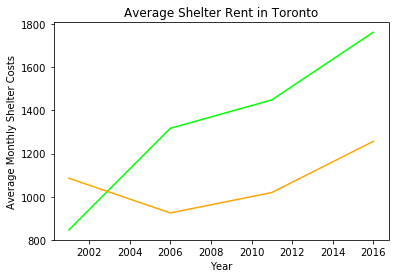

In [26]:
# Getting the data from the top 10 expensive neighbourhoods
expensive = toronto_data[['neighbourhood','single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house','duplex','apartment_five_storeys_less','other_house','average_house_value','shelter_costs_owned','shelter_costs_rented']].groupby('neighbourhood').mean().sort_values(by = 'average_house_value',ascending=False)

expensive = expensive[:10]

expensive.reset_index(inplace=True)

expensive_plot = expensive.hvplot.bar(x ='neighbourhood', y = 'average_house_value', rot = 90, height = 500,title = 'Top 10 Most Expensive Neighbourhoods in Toronto', xlabel = 'Neighbourhood', ylabel = 'Average Dwelling Value')

# Calculate the mean number of dwelling types units per year
# Fetch the data of all dwelling types per year
no_types = toronto_data.drop(columns = ['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented']).groupby(['neighbourhood', 'year']).mean()


columns = ['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']

columns_plot = no_types.hvplot.bar(x = 'year', y = columns, rot = 90, groupby = 'neighbourhood').opts(height = 500, width = 800, fontsize = {'title':15, 'ylabel':15, 'xlabel':15}, xlabel = 'Year/Type of Dwelling', ylabel = 'Dwelling Type Units')

# Calculate the average monthly shelter costs for owned and rented dwellings
avg_cost = toronto_data[['shelter_costs_owned', 'shelter_costs_rented']].groupby(toronto_data.index).mean()

# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    plt.plot(data, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
shelter_owned_plot = create_line_chart(avg_cost['shelter_costs_owned'],'Average Shelter Value in Toronto', 'Year', 'Average Monthly Shelter Costs', 'lime')

shelter_rented_plot = create_line_chart(avg_cost['shelter_costs_rented'],'Average Shelter Rent in Toronto', 'Year', 'Average Monthly Shelter Costs', 'orange')

### Panel Visualization Functions

In [27]:
#DONE IN GLOBAL DATA


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [28]:
# Create tabs
dashboard = pn.Tabs(
    ('Expensive House', expensive_plot) , ('Number of Dwellings', columns_plot) , ('Average monthly Shelter Cost Owned', shelter_owned_plot) , ('Average monthly Shelter Cost Rented', shelter_rented_plot)
)

## Serve the Panel Dashboard

In [29]:
dashboard.servable()

#Average shelters tabs are not desplaying the graphs but there is no syntax errors, bizzare.

Tabs
    [0] HoloViews(Bars, name='Expensive House')
    [1] Row(name='Number of Dwellings')
        [0] HoloViews(DynamicMap, name='Number of Dwellings')
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
            [1] VSpacer()
    [2] Str(None, name='Average monthly S...)
    [3] Str(None, name='Average monthly S...)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [9]:
# Create a Title for the Dashboard


In [10]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [11]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [12]:
# average_house_value()

In [13]:
# average_value_by_neighbourhood()

In [14]:
# number_dwelling_types()

In [15]:
# average_house_value_snapshot()

In [16]:
# top_most_expensive_neighbourhoods()

In [17]:
# sunburts_cost_analysis()